In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df="C:/Users/Admin/Downloads/Thyroid.csv/Thyroid_Diff.csv"
data=pd.read_csv(df)
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [74]:
data.describe()


,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [75]:
#Data cleaning
#rename columns for easier understanding of the data
data.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)
data.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  383 non-null    int64 
 1   Gender                               383 non-null    object
 2   Smoking                              383 non-null    object
 3   Smoking History                      383 non-null    object
 4   Radiotherapy History                 383 non-null    object
 5   Thyroid Function                     383 non-null    object
 6   Physical Examination                 383 non-null    object
 7   Adenopathy                           383 non-null    object
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object
 9   Focality                             383 non-null    object
 10  Risk                                 383 non-null    object
 11  Tumor                                383 non-

In [77]:
#we will still rename our values for easier interpretation
data['Adenopathy'].replace({'No' : 'No Lympth Adenopathy' ,
                          'Left' : 'Left Side Body Adenopathy' ,
                          'Right' : 'Right Side Body Adenopathy' ,
                          'Extensive' : 'Extensive and Widespread'}, inplace = True)

data['Stage'].replace({'I' : 'First-Stage' , 'II' : 'Second-Stage' , 'III' : 'Third-Stage'} ,inplace = True)

data['Tumor'].replace({'T1a' : 'tumor that is 1 cm or smaller' , 'T1b' : 'tumor larger than 1 cm but not larger than 2 cm' ,
                     'T2' : 'tumor larger than 2 cm but not larger than 4 cm' , 
                     'T3a' : 'tumor larger than 4 cm' ,'T3b' : 'tumor that has grown outside the thyroid' ,
                     'T4a' : 'tumor that has invaded nearby structures' , 'T4b' : 'tumor that has invaded nearby structures'} , inplace =True)

data['Lymph Nodes'].replace({'N0' : 'no evidence of regional lymph node metastasis' ,
                     'N1b' : 'regional lymph node metastasis in the central  of the neck' ,
                     'N1a' : 'regional lymph node metastasis in the lateral of the neck'} , inplace =True)

data['Cancer Metastasis'].replace({'M0': 'no evidence of distant metastasis' , 'M1' : 'the presence of distant metastasis'} ,inplace =True )

data.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Multi-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No


In [44]:
data.describe()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,1.950392,2.561358,2.924282,2.550914,0.644909,1.566580,1.953003,0.357702,0.046997,0.357702,1.574413,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.630917,1.350110,1.172106,0.890257,0.479167,0.643233,1.527372,0.587823,0.211910,0.957192,0.917585,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,3.000000,1.000000,2.000000,5.000000,2.000000,1.000000,4.000000,3.000000,1.000000


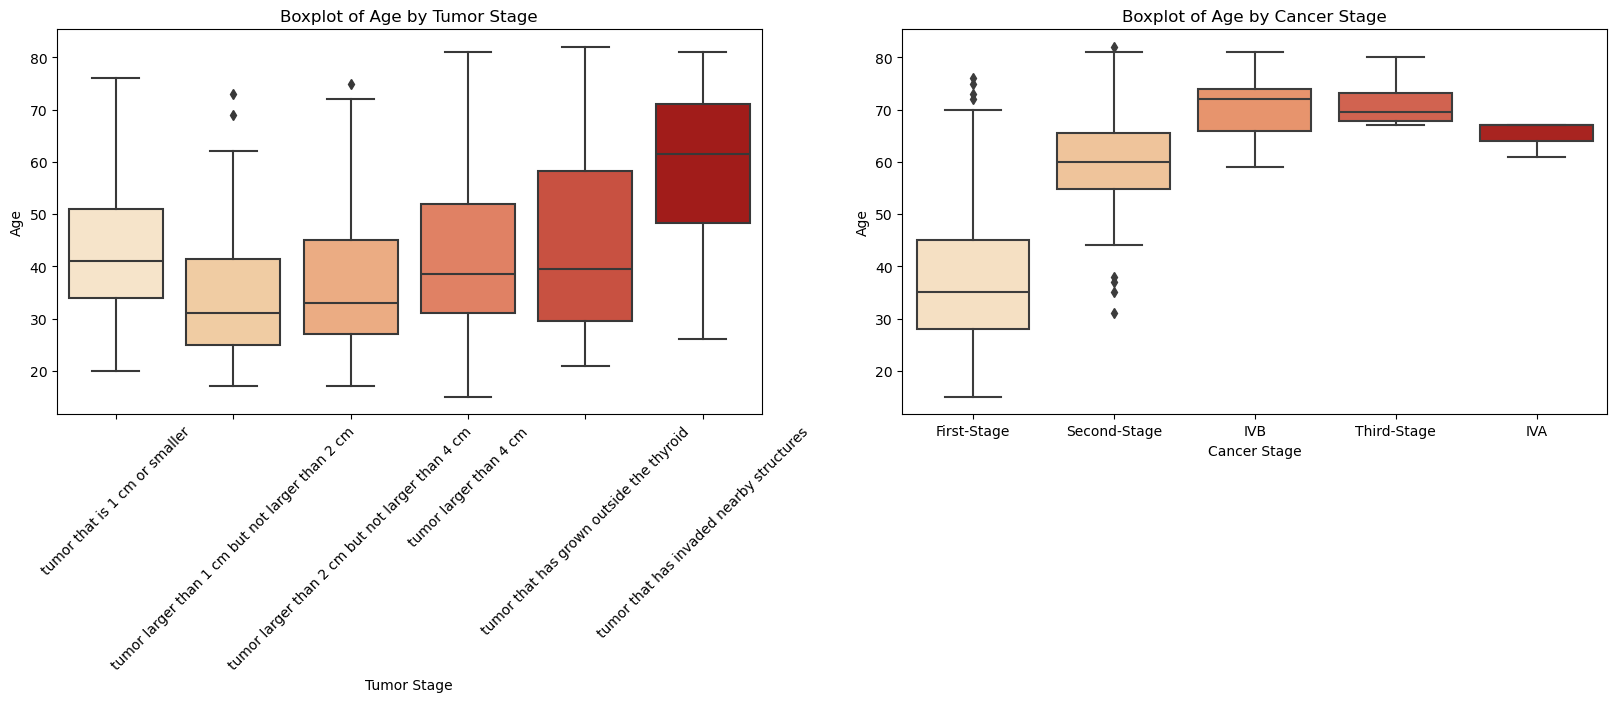

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Boxplot for Tumor by Age
sns.boxplot(x='Tumor', y='Age', data=data, palette="OrRd", ax=axes[0])
axes[0].set_title('Boxplot of Age by Tumor Stage') 
axes[0].set_xlabel('Tumor Stage')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for cancer Stage by age
sns.boxplot(x='Stage', y='Age', data=data,palette="OrRd", ax=axes[1])
axes[1].set_title('Boxplot of Age by Cancer Stage')
axes[1].set_xlabel('Cancer Stage')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=0)

plt.show()


In [79]:
def map_risks_to_percentage(risk):
    if risk == 'Low':
        return 1
    elif risk == 'Intermediate':
        return 2
    else:
        return 3

# Apply the function to create the new column
data['Risk Rate (Out of 3)'] = data['Risk'].apply(map_risk_to_percentage)

In [80]:
#A pivot table to show the risk of each patient based on age and cancer stage
pd.set_option('display.max_columns', None)
pivot_table = pd.pivot_table(data, values='Risk Rate (Out of 3)', index=['Stage', 'Smoking'], columns='Age', fill_value=None).round(1)
pivot_table

Age                    15   17   18   19   20   21   22   23   24   25   26  \
Stage        Smoking                                                          
First-Stage  No       2.0  2.0  2.0  1.0  1.5  1.2  1.2  1.2  1.1  1.1  1.3   
             Yes      NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  3.0   
IVA          Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Second-Stage No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Third-Stage  No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age                    27   28   29   30   31   32   33   34   35   36   37  \
Stage        Smoking                                                          
First-Stage  No       1.2  1.1  1.2  1.2  1.4  1.4  1.2  1.6  1.4  1.3  1.2   
             Yes      NaN  1.0  1.0  NaN  1.2  NaN  NaN  NaN  NaN  NaN  NaN   
IVA          Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Second-Stage No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0   
             Yes      NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  3.0  NaN  NaN   
Third-Stage  No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age                    38   39   40   41   42   43   44   45   46   47   48  \
Stage        Smoking                                                          
First-Stage  No       1.1  1.0  1.3  1.0  1.2  1.0  1.3  1.1  1.2  1.5  1.8   
             Yes      2.0  NaN  2.0  2.0  NaN  NaN  1.0  NaN  NaN  NaN  NaN   
IVA          Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Second-Stage No       3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  3.0  NaN  NaN   
Third-Stage  No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age                    49   50   51   52   53   54   55   56   57   58   59  \
Stage        Smoking                                                          
First-Stage  No       1.8  1.2  1.2  1.0  2.3  1.0  1.0  1.0  1.0  NaN  1.0   
             Yes      NaN  NaN  NaN  1.2  NaN  NaN  NaN  2.0  1.0  NaN  2.0   
IVA          Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Second-Stage No       NaN  NaN  3.0  NaN  NaN  NaN  2.0  2.5  NaN  2.0  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  NaN   
Third-Stage  No       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Age                    60   61   62   63   64   65   66   67   68   69   70  \
Stage        Smoking                                                          
First-Stage  No       1.2  1.0  1.2  1.0  NaN  NaN  1.0  1.0  1.0  1.0  1.0   
             Yes      NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN   
IVA          Yes      NaN  3.0  NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN   
IVB          No       NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  3.0  NaN  NaN   
             Yes      NaN  NaN  3.0  NaN  NaN 

Insights
1. The higher the stage  of thyroid cancer, the greater patients risk
2. Smoking also increases the patient's risk of getting thyroid cancer

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


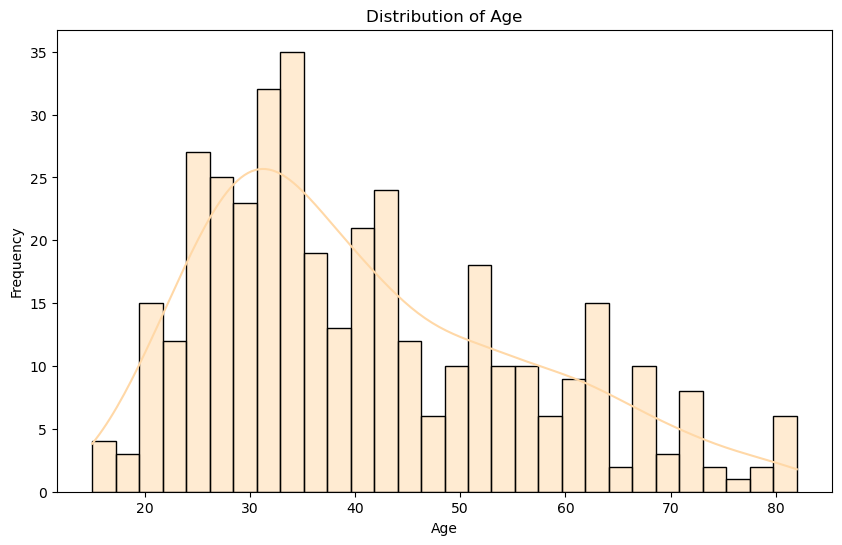

In [81]:
#Age distribution using histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='#ffd8a7')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Majority of these patients are aged between 25 and 35 years of age

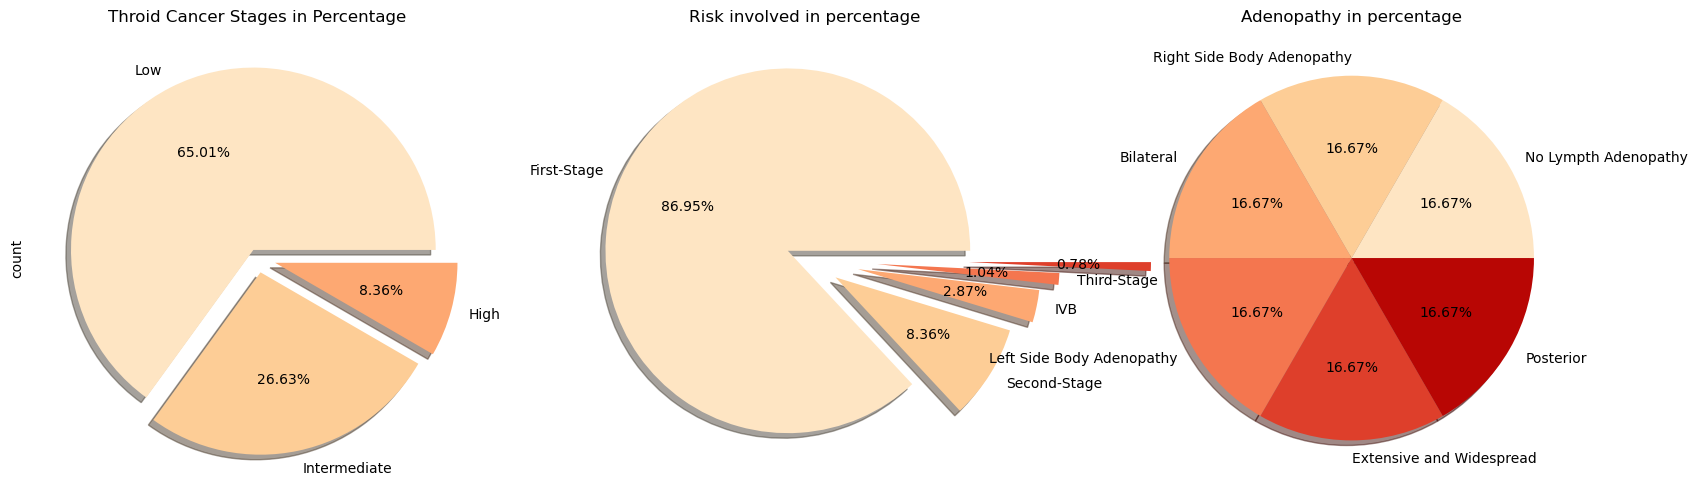

In [82]:
#Pie chart for thyroid cancer stages
sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

Stage_of_Cancer = data['Stage'].value_counts()
Stage_of_Cancer.plot(kind='pie', autopct='%0.2f%%', labels=Stage_of_Cancer.index, explode=[0.1, 0.2, 0.3, 0.4, 0.9], shadow=True, ax=axes[1])
axes[0].set_title('Throid Cancer Stages in Percentage')
axes[0].set_ylabel('')

risk_data = data['Risk'].value_counts()
risk_data.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risk_data.index, shadow=True, ax=axes[0])
axes[1].set_title('Risk involved in percentage')
axes[1].set_ylabel('')

aden = data['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[2])
axes[2].set_title('Adenopathy in percentage')
axes[2].set_ylabel('')

plt.show()

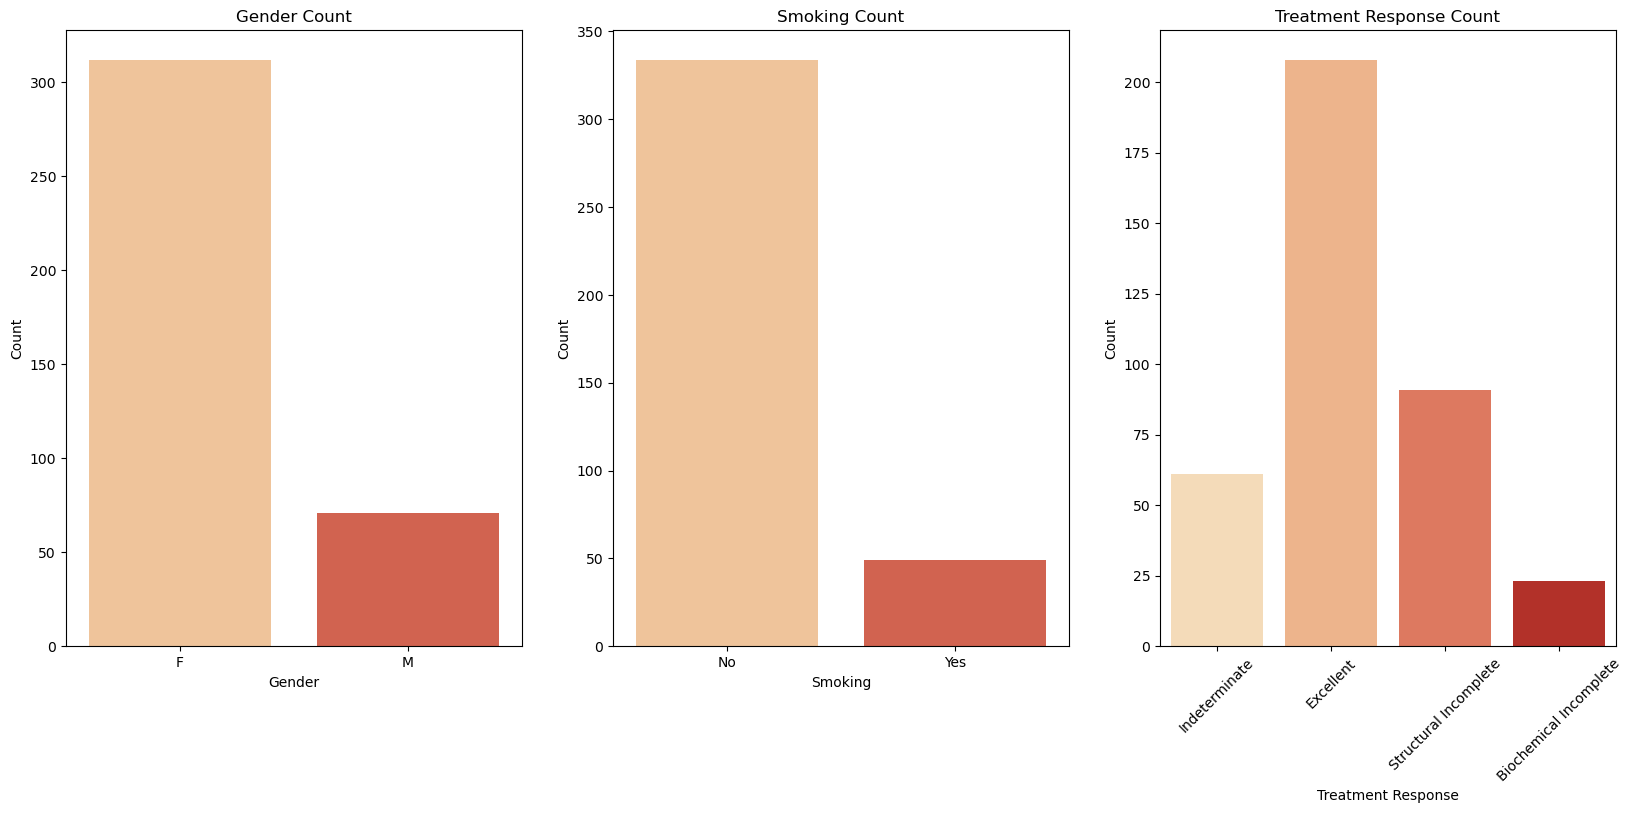

In [83]:
#patients count per gender category

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

#Display the count of patients in each gender category.
sns.countplot(x='Gender', data=data, palette='OrRd', ax=axes[0])
axes[0].set_title('Gender Count')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='Smoking', data=data, palette='OrRd', ax=axes[1])
axes[1].set_title('Smoking Count')
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Count')

sns.countplot(x='Treatment Response', data=data, palette='OrRd',  ax=axes[2])
axes[2].set_title('Treatment Response Count')
axes[2].set_xlabel('Treatment Response')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
plt.show()


Insights
1. Feamales are the most affected with Thyroid cancer
2. smoking doesn't affect thyroid cancer that much
3. Recovery rate from thryroid cancer is excellent

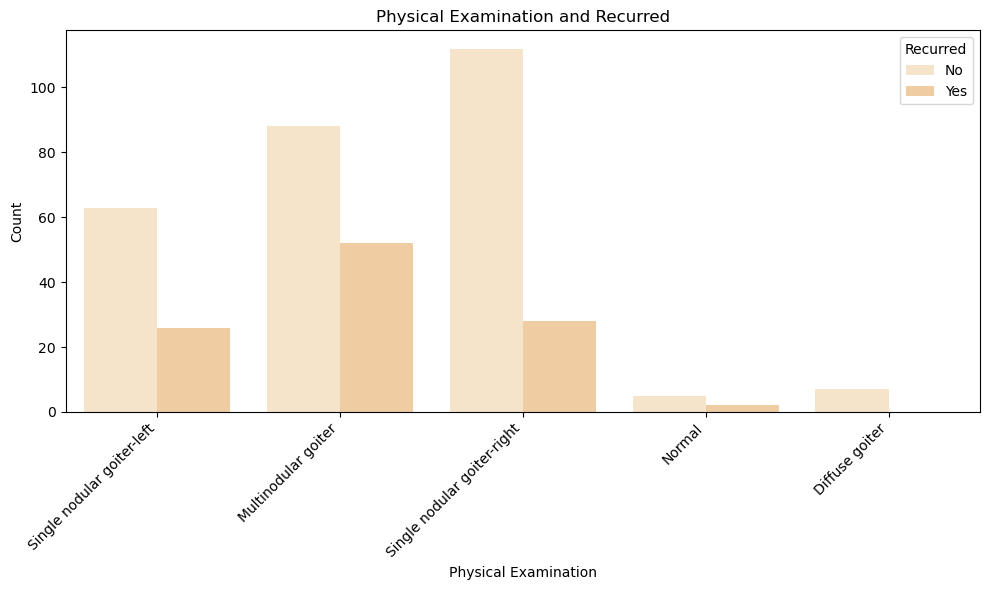

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical Examination', hue='Recurred', data=data)

plt.title('Physical Examination and Recurred')
plt.xlabel('Physical Examination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Recurred')
plt.tight_layout()

plt.show()

Insight
1. Patients with multinodular goiter are at a higher risk of recurrent goiter
2. Patients with diffuse goiter are not at risk of recurrent goiter

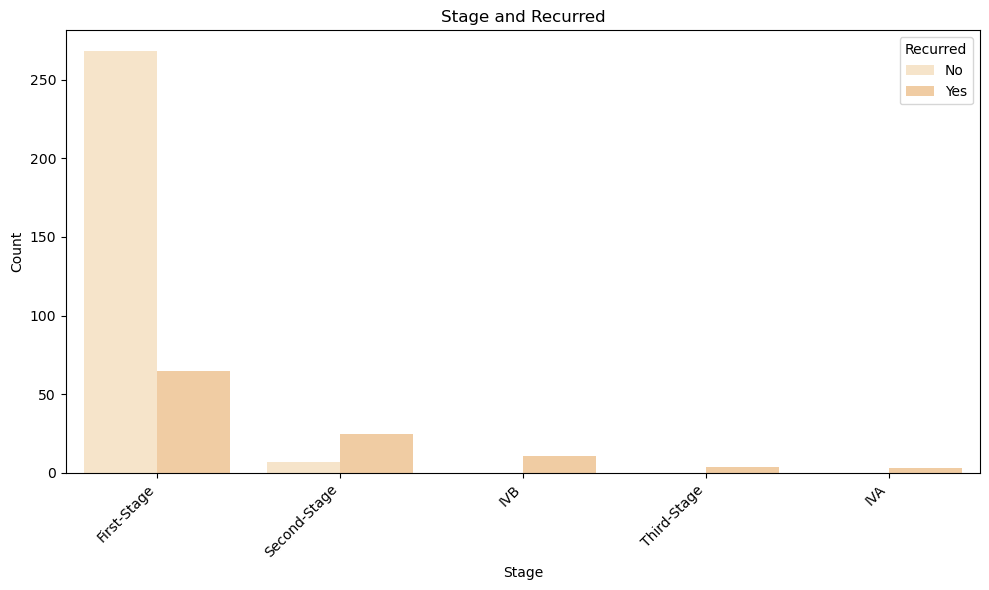

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stage', hue='Recurred', data=data)

plt.title('Stage and Recurred')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Recurred')
plt.tight_layout()

plt.show()

Patients at the first stage have higher chance of recurrent goiter

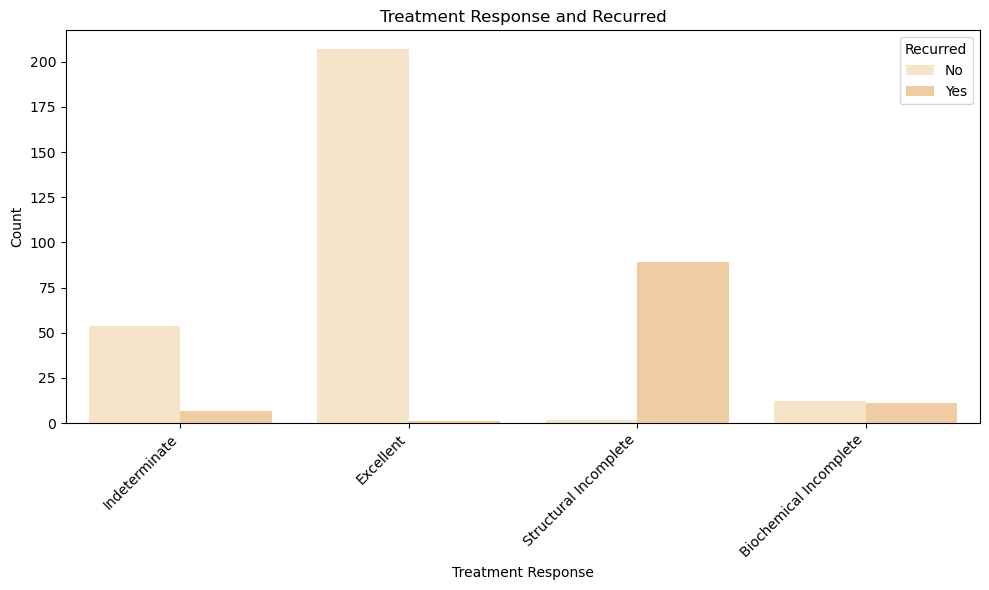

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Treatment Response', hue='Recurred', data=data)

plt.title('Treatment Response and Recurred')
plt.xlabel('Treatment Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Recurred')
plt.tight_layout()

plt.show()

Patients who received structural incomplete treatment are at a higher risk of recurrent goiter

Prediction

In [87]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
categorical = data.select_dtypes(include = "object")
for column in categorical.columns:
  data[column] = encoder.fit_transform(data[column])

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV


X = data.drop(columns = 'Recurred')
y = data['Recurred']

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
print("No of Recurred Cases:", len(data[data["Recurred"]=="Yes"]))
print("No of Non-Recurred Cases:",len(data)-len(data[data["Recurred"]=="Yes"]))


No of Recurred Cases: 0
No of Non-Recurred Cases: 383


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Recurred', axis=1)), columns=data.columns[:-1])
data_scaled.head(5)

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response
0,-0.917439,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,0.325319,0.064684,-0.619635,0.742029,0.674696,1.997538,-0.609316,-0.22207,-0.374188,0.464420
1,-0.454315,-0.477037,-0.383023,3.560698,-0.136444,0.078732,-1.157980,0.064684,-0.619635,0.742029,0.674696,1.997538,-0.609316,-0.22207,-0.374188,-0.626824
2,-0.718957,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,1.997538,-0.609316,-0.22207,-0.374188,-0.626824
3,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,1.066968,0.064684,-0.619635,0.742029,0.674696,1.997538,-0.609316,-0.22207,-0.374188,-0.626824
4,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,0.078732,-1.157980,0.064684,-0.619635,-1.347656,0.674696,1.997538,-0.609316,-0.22207,-0.374188,-0.626824


In [40]:
#models we are going to use to predict recurrence of throid cancer disease in patients
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}
params = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

In [41]:
#model training and evaluation
best_models = {}
best_params = {} 
for name, model in models.items():
    clf = GridSearchCV(model, params[name], cv=5)
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_
    best_params[name] = clf.best_params_

# Evaluation and selection
best_accuracy = 0
best_model_name = None
best_model = None
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{name}: Accuracy = {accuracy:.2f}, F1 Score = {f1:.2f}, Best Hyperparameters = {best_params[name]}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

print(f'Best model: {best_model_name}, Accuracy = {best_accuracy:.2f}, Best Hyperparameters = {best_params[best_model_name]}')

KNN: Accuracy = 0.83, F1 Score = 0.82, Best Hyperparameters = {'n_neighbors': 5}
SVM: Accuracy = 0.87, F1 Score = 0.87, Best Hyperparameters = {'C': 0.1, 'kernel': 'linear'}
Random Forest: Accuracy = 0.96, F1 Score = 0.96, Best Hyperparameters = {'max_depth': None, 'n_estimators': 100}
XGBoost: Accuracy = 0.96, F1 Score = 0.96, Best Hyperparameters = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best model: Random Forest, Accuracy = 0.96, Best Hyperparameters = {'max_depth': None, 'n_estimators': 100}


In [42]:
# Evaluating the best model with additional metrics
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nBest Model: {best_model_name}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Best Model: Random Forest
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Confusion Matrix:
[[52  2]
 [ 1 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.92      0.96      0.94        23

    accuracy                           0.96        77
   macro avg       0.95      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77



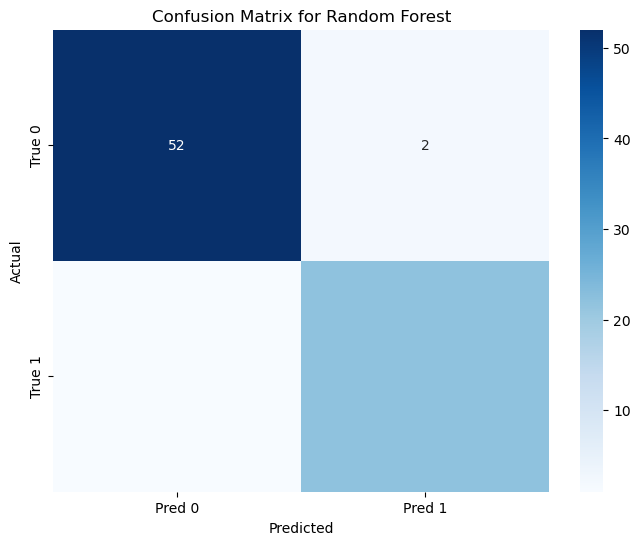

In [45]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

In [48]:
import joblib

# Save the best model to a file
joblib.dump(best_model, "Thyroid_Cancer_bestmodel.pk1")

['Thyroid_Cancer_bestmodel.pk1']